In [2]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('E:/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Feature Scaling
#feature scaling is required in DL
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
import tensorflow
print(tensorflow.__version__)

2.9.1


In [11]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [12]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [13]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [14]:
#sequential for creating neural networks
#Dense for creating Hidden layers
#dropout is used for regularization technique.

In [22]:
# Initialising the ANN
#empty neural network
classifier = Sequential()

In [23]:
# Adding the input layer and the first hidden layer
#whenever RELU used , he_uniform or he_normal used for initilizing the weights (W)we can use used along with kernel initializer
classifier.add(Dense(units = 6,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

In [24]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [26]:
X_train.shape

(8000, 11)

In [28]:
# Fitting the ANN to the Training set
#am considering less epochs here to run the data
#call back ativated automatically
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100,epochs = 20)

Epoch 1/20
54/54 [==============================] - 4s 13ms/step - loss: 0.5847 - accuracy: 0.7709 - val_loss: 0.5616 - val_accuracy: 0.7868
Epoch 2/20
54/54 [==============================] - 0s 3ms/step - loss: 0.5362 - accuracy: 0.7946 - val_loss: 0.5280 - val_accuracy: 0.7925
Epoch 3/20
54/54 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7964 - val_loss: 0.5070 - val_accuracy: 0.7948
Epoch 4/20
54/54 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.7994 - val_loss: 0.4925 - val_accuracy: 0.7982
Epoch 5/20
54/54 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.8029 - val_loss: 0.4825 - val_accuracy: 0.8008
Epoch 6/20
54/54 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.8028 - val_loss: 0.4755 - val_accuracy: 0.8023
Epoch 7/20
54/54 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.8043 - val_loss: 0.4698 - val_accuracy: 0.8016
Epoch 8/20
54/54 [=

In [29]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
#to visualize the ANN network
from ann_visualizer.visualize import ann_viz

In [66]:
#ann_viz(classifier, view=True,filename="E:/GGG",title="MyNeural Network")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


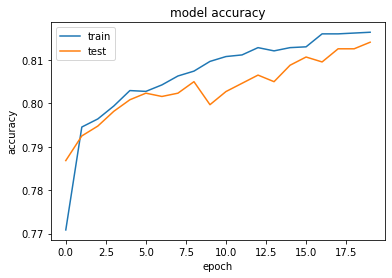

In [68]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

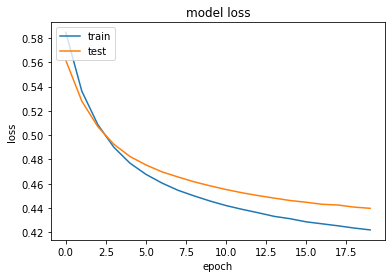

In [69]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [71]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [72]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [73]:
cm

array([[1536,   59],
       [ 290,  115]], dtype=int64)

In [74]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [75]:
score

0.8255

In [76]:
#to select hidden layers and how many hidden layers we use hyper parameter tuning techniques to find out.

# KERAS tuner used to decide number of hidden layers and NN

In [78]:
# Importing the dataset
dataset = pd.read_csv('E:/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [79]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [81]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Perform Hyperparameter Optimization

In [82]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [83]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [84]:
model = KerasClassifier(build_fn=create_model, verbose=0)

C:\Users\GOPINA~1\AppData\Local\Temp/ipykernel_12880/2566461152.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [85]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)


In [86]:

grid_result = grid.fit(X_train, y_train)


In [87]:
[grid_result.best_score_,grid_result.best_params_]

[0.856375002861023,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': [45, 30, 15]}]

In [89]:
pred_y = grid.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [91]:
cm

array([[1536,   59],
       [ 290,  115]], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [93]:
score

0.8255

In [88]:
#one more way.

In [94]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [102]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project1',
    project_name='Churn')

C:\Users\GOPINA~1\AppData\Local\Temp/ipykernel_12880/2788324925.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [103]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [104]:
"""## hyper parameter in random search CV
1)How many number of hidden layers we sould have
2)how many number of neurons we have in hidden layer
3)what should be the learning rate
4)

"""

'## hyper parameter in random search CV\n1)How many number of hidden layers we sould have\n2)how many number of neurons we have in hidden layer\n3)what should be the learning rate\n4)\n\n'

In [105]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 30s]
val_accuracy: 0.8666666746139526

Best val_accuracy So Far: 0.8666666746139526
Total elapsed time: 00h 02m 33s
INFO:tensorflow:Oracle triggered exit


In [106]:
Trial complete
Trial summary
|-Trial ID: 1be3507004780170aa4443e3cc0c2e5b
|-Score: 0.7974999944368998
|-Best step: 0
Hyperparameters:
|-learning_rate: 0.0001
|-num_layers: 4
|-units_0: 512
|-units_1: 288
|-units_2: 32
|-units_3: 32

SyntaxError: invalid syntax (Temp/ipykernel_12880/1323548556.py, line 1)

In [107]:
tuner.get_best_hyperparameters

<bound method BaseTuner.get_best_hyperparameters of <keras_tuner.tuners.randomsearch.RandomSearch object at 0x0000000591165E50>>

In [108]:
tuner.get_best_models()

In [109]:
tuner.results_summary()

Results summary
Results in project1\Churn
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 7
units_0: 352
units_1: 320
learning_rate: 0.0001
units_2: 160
units_3: 224
units_4: 384
units_5: 224
units_6: 224
units_7: 416
units_8: 64
units_9: 128
units_10: 160
units_11: 32
units_12: 64
units_13: 160
Score: 0.8666666746139526
Trial summary
Hyperparameters:
num_layers: 3
units_0: 192
units_1: 416
learning_rate: 0.0001
units_2: 32
Score: 0.8651666641235352
Trial summary
Hyperparameters:
num_layers: 5
units_0: 192
units_1: 288
learning_rate: 0.0001
units_2: 352
units_3: 128
units_4: 160
units_5: 352
units_6: 96
units_7: 448
units_8: 480
units_9: 320
units_10: 512
units_11: 256
units_12: 480
units_13: 128
Score: 0.8628333409627279
Trial summary
Hyperparameters:
num_layers: 14
units_0: 320
units_1: 96
learning_rate: 0.01
units_2: 64
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
Score: 0.85

In [110]:
tuner.search_space_summary()

Search space summary
Default search space size: 16
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co